<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter4/Data_Preprocessing_6_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris_load = load_iris()
iris = pd.DataFrame(iris_load.data, columns = iris_load.feature_names)

iris['Class'] = iris_load.target
iris['Class'] = iris['Class'].map({0:'Setosa',1:'Versicolor',2:'Virginica'})

# 1. PCA를 위한 전처리

In [4]:
x = iris.drop(columns = ['Class'])

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# 2. 주성분 추출

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
pca_fit = pca.fit(x)

print("고유 값: ", pca.singular_values_)
print("분산 설명력 : ", pca.explained_variance_ratio_)

고유 값:  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력 :  [0.72962445 0.22850762 0.03668922 0.00517871]


# 3. Scree Plot으로 사용할 주성분의 개수 정하기

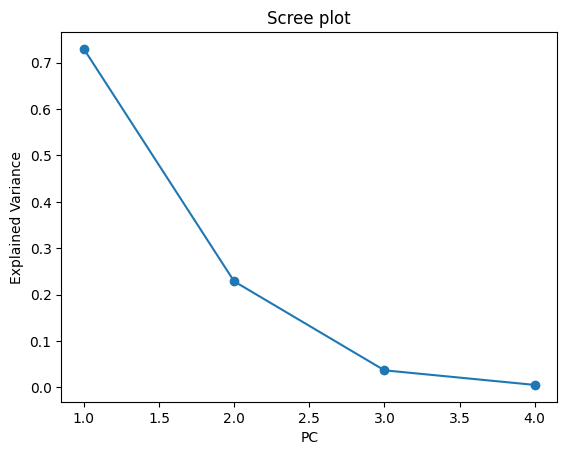

In [17]:
import matplotlib.pyplot as plt

plt.title('Scree plot')
plt.xlabel('PC')
plt.ylabel('Explained Variance')
plt.plot( range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'o-')
plt.show()

# 4. 새로운 데이터프레임 확인

In [18]:
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principal_iris = pd.DataFrame(principalComponents, columns = ['pc1','pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


# 5. 주성분 산포도 확인

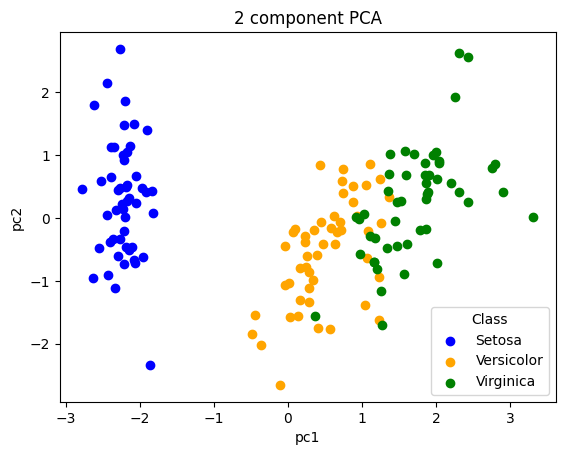

In [49]:
import matplotlib.pyplot as plt

plt.scatter(principal_iris[iris['Class']=='Setosa']['pc1'],principal_iris[iris['Class']=='Setosa']['pc2'],label='Setosa',color = 'b')
plt.scatter(principal_iris[iris['Class']=='Versicolor']['pc1'],principal_iris[iris['Class']=='Versicolor']['pc2'],label='Versicolor',color = 'orange')
plt.scatter(principal_iris[iris['Class']=='Virginica']['pc1'],principal_iris[iris['Class']=='Virginica']['pc2'],label='Virginica',color = 'g')

plt.title('2 component PCA')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(title = 'Class',loc = 'lower right')
plt.show()

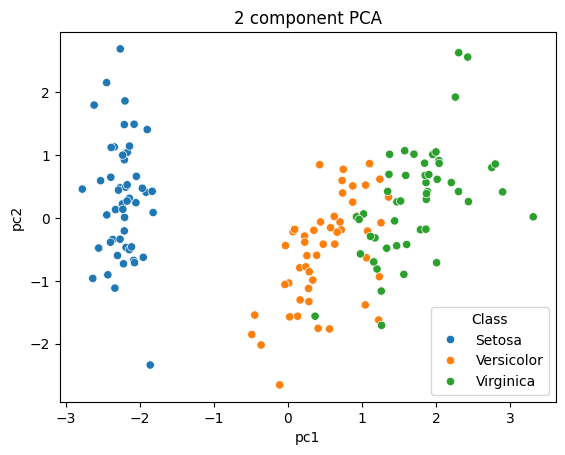

In [52]:
import seaborn as sns

plt.title('2 component PCA')
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris.Class, data = principal_iris)
plt.show()